In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
dataf = pd.read_csv("results/responses.csv")

In [235]:
def getBars(df,labels,value):
    bars = []
    for i in labels:
        bars.append(df.groupby("modal").get_group(i)[value].tolist())
    return bars

def plotBars(bars, ylabel, labels, fluxos, fname):
    # set width of bar
    barWidth = 0.2
    sns.set(style="white")

    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    colors = ["#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d"]
    
    r1 = np.arange(len(bars[0]*2),step=2)
    for i in range(len(bars)): # bar number per flow

        plt.bar(r1, bars[i], color=colors[i], width=barWidth, edgecolor='white', label=labels[i],hatch=patterns[i])
        r1 = [x + barWidth for x in r1]
    
    # Add xticks on the middle of the group bars
    plt.xlabel('Flows', fontweight='bold')
    plt.ylabel(ylabel[0].upper() + ylabel[1:], fontweight='bold')
    print([r + 2*barWidth for r in range(len(bars[0]))])
    plt.xticks([2*r + 4*barWidth for r in range(len(bars[0]))], fluxos)
 
    # Create legend & Show graphic
    plt.legend(loc="upper center",bbox_to_anchor=(0.33,1.25),fancybox=True,shadow=True,ncol=3)
    
    sns.despine()
    plt.rcParams["figure.figsize"] = (8,4)
    
    #plt.savefig('data/results/plots/'+fname)
    plt.show()
    plt.close()

def plotBoxPlots(df, ylabel, title, fname):
    sns.set(style="whitegrid")
    ax = sns.boxplot(x="Modo", y=ylabel, data=df)
    plt.xlabel('')
    plt.ylabel(ylabel, fontweight='bold')
    plt.title(title,fontweight='bold')
    #plt.savefig('data/results/plots/'+fname)
    plt.show()
    plt.close()

[0.4, 1.4, 2.4, 3.4]


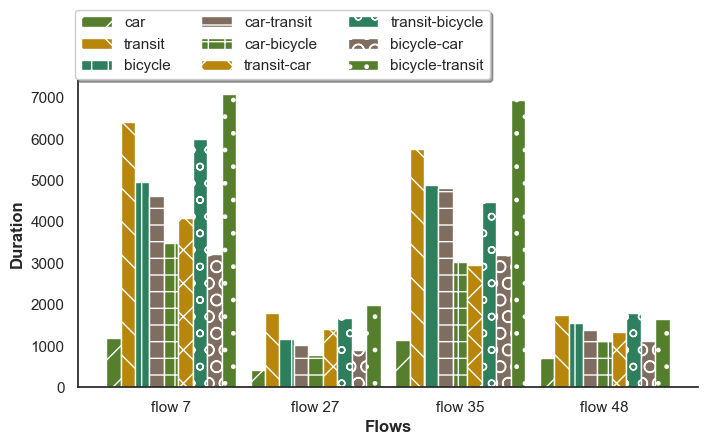

[0.4, 1.4, 2.4, 3.4]


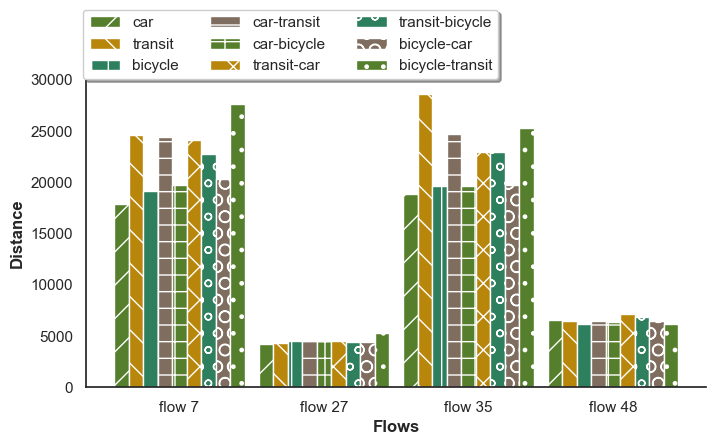

[0.4, 1.4, 2.4, 3.4]


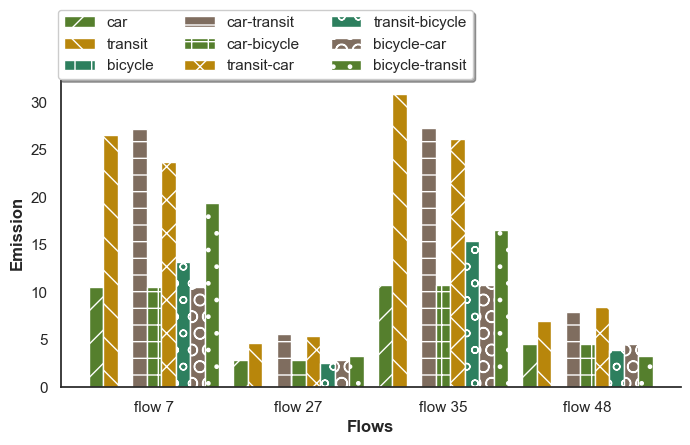

[0.4, 1.4, 2.4, 3.4]


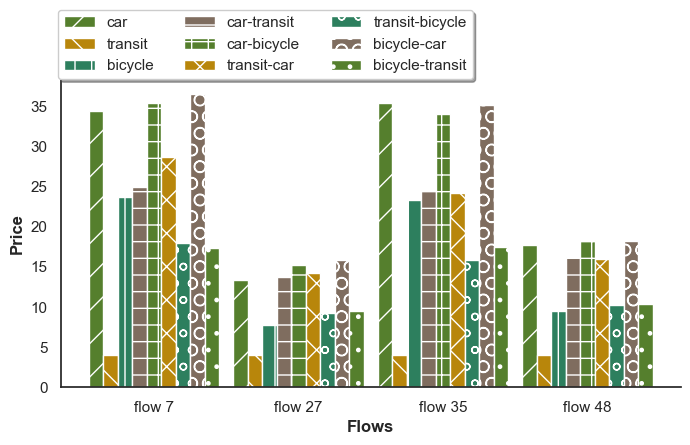

In [273]:
rmLabels = ['Unnamed: 0','setID','modal']
ylabels = dataf.columns
ylabels = [ele for ele in ylabels if ele not in rmLabels]

set_ids = dataf['setID'].unique()[:4].tolist()
labels = dataf['modal'].unique().tolist()

flows = list(map(lambda x: f"flow {int(x)}",set_ids))
if labels[-1] == 'error' : labels = labels[:len(labels)-1]

flist = [7,27,35,48]
filtered_df = dataf.loc[dataf['setID'].isin(flist)]
for i in ylabels:
    bars = getBars(filtered_df,labels,i)
    
    plotBars(bars,i,labels,flows,'test')
    

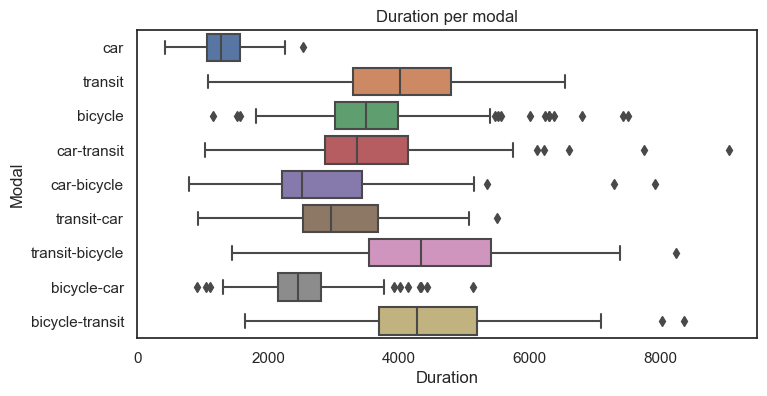

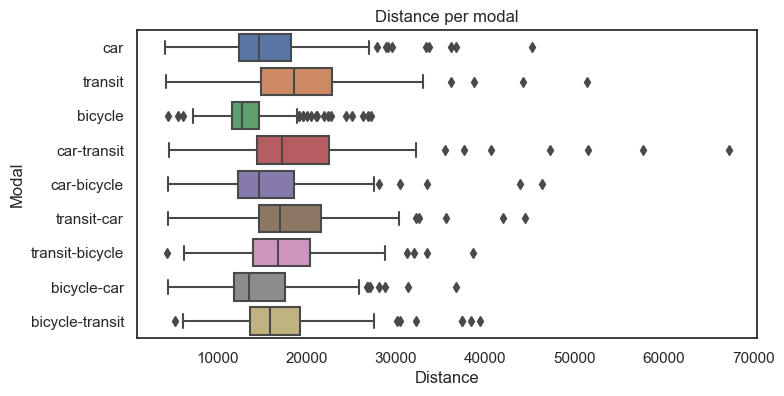

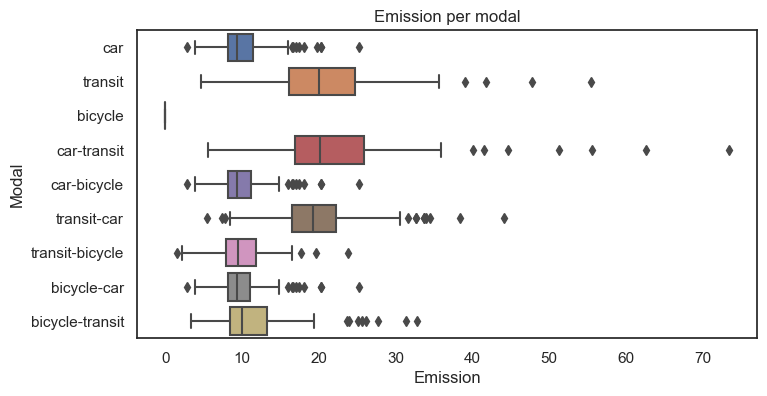

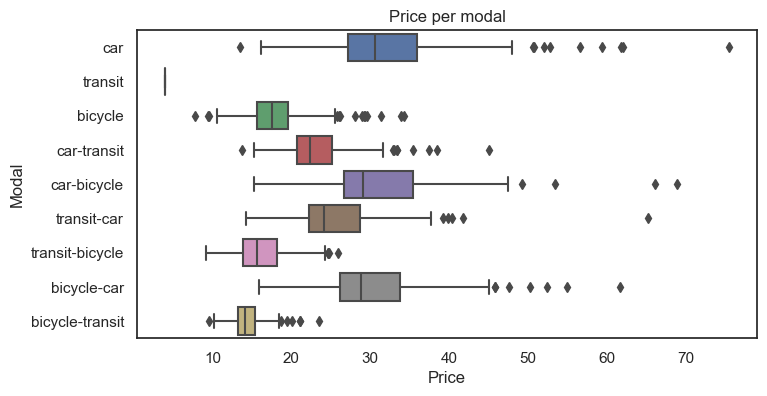

In [281]:
dataf_new = dataf.drop(dataf[dataf['modal'] == "error"].index)

for i in range(len(ylabels)):
    upper = ylabels[i][0].upper() + ylabels[i][1:]
    plt.figure()
    plt.title(f"{upper} per modal")
    sns.boxplot(data=dataf_new,x=ylabels[i],y="modal")
    plt.xlabel(upper)
    plt.ylabel("Modal")
    plt.show()